In [5]:
import sys
sys.path.append("~/Desktop/pypsa-za-master")

In [6]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [7]:
import pandas as pd
import geopandas as gpd
import numpy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
from vresutils import plot as vplot
from vresutils import Dict

In [8]:
#Pre_solved - show network for 2022
n = pypsa.Network("networks/pre_val-LC-UNC_27-supply_redz_lcopt_LC-1H.nc")

INFO:pypsa.io:Imported network pre_val-LC-UNC_27-supply_redz_lcopt_LC-1H.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [91]:
print(n)

PyPSA Network 'PyPSA-ZA'
Components:
 - Bus: 27
 - Carrier: 11
 - Generator: 631
 - GlobalConstraint: 96
 - Line: 120
 - Load: 27
 - StorageUnit: 328
Snapshots: 52560


In [123]:
n.carriers

,co2_emissions,color,nice_name,max_growth
Carrier,,,,
CSP,0.0000,#FEED82,Csp,inf
biomass,0.0000,#0c6013,Biomass,inf
PHS,0.0000,#004F95,Pumped Hydro Storage,inf
coal,0.3000,#3C3C3C,Coal,inf
gas,0.1794,#d35050,Gas,inf
hydro,0.0000,#004F95,Hydro,inf
hydro-import,0.0000,#004F95,Hydro-Import,inf
nuclear,0.0000,#C84936,Nuclear,inf
CCGT,0.1794,#CCC8C8,CCGT,inf


In [47]:
n.buses

,x,y,v_nom,population,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,,
NAMAQUALAND,18.908377,-28.955801,400.0,1.236927e+05,,AC,None,1.0,0.0,inf,PQ,
WEST COAST,19.461249,-31.257597,400.0,3.042586e+05,,AC,None,1.0,0.0,inf,PQ,
PENINSULA,18.880971,-33.770489,400.0,4.287938e+06,,AC,None,1.0,0.0,inf,PQ,
SOUTHERN CAPE,21.111201,-32.980465,400.0,1.136102e+06,,AC,None,1.0,0.0,inf,PQ,
PORT ELIZABETH,24.766811,-32.712855,400.0,1.700147e+06,,AC,None,1.0,0.0,inf,PQ,
KAROO,24.052750,-30.409650,400.0,4.383966e+05,,AC,None,1.0,0.0,inf,PQ,
KIMBERLEY,23.087957,-27.591979,400.0,1.203351e+06,,AC,None,1.0,0.0,inf,PQ,
CARLETONVILLE,26.049052,-26.488231,400.0,1.850542e+06,,AC,None,1.0,0.0,inf,PQ,
WELKOM,26.978115,-27.618006,400.0,8.279928e+05,,AC,None,1.0,0.0,inf,PQ,


In [239]:
n.lines

,bus0,bus1,length,num_parallel,s_nom_min,s_nom_extendable,type,capital_cost,s_max_pu,x,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,NAMAQUALAND,WEST COAST,326.766981,2.000000,3574.952867,True,Al/St 240/40 4-bundle 380.0,207160.761315,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PENINSULA,WEST COAST,355.834024,3.000000,5362.429300,True,Al/St 240/40 4-bundle 380.0,225588.420978,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SOUTHERN CAPE,WEST COAST,308.324655,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,195468.863073,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KAROO,WEST COAST,560.470650,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,355322.089646,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NAMAQUALAND,KIMBERLEY,545.569156,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,345874.975966,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,HIGHVELD NORTH,LOWVELD,179.915983,5.363281,9586.738840,True,Al/St 240/40 4-bundle 380.0,114061.500323,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,PRETORIA,HIGHVELD NORTH,169.997198,8.000000,14299.811467,True,Al/St 240/40 4-bundle 380.0,107773.278965,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,NIGEL,HIGHVELD NORTH,200.769878,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,127282.262881,0.7,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
s = n.generators.groupby(['bus', 'carrier'])['p_nom'].sum()
s = s[s != 0]  # filter carriers with sum of p_nom equal to 0

In [11]:
s.head(70)

bus             carrier     
BLOEMFONTEIN    hydro               8.02
                solar              64.00
CARLETONVILLE   solar              67.90
EAST LONDON     gas               171.00
                hydro              65.00
                onwind            184.75
EMPANGENI       biomass            16.50
HIGHVELD NORTH  coal            12791.00
HIGHVELD SOUTH  coal             8670.00
JOHANNESBURG    biomass             7.56
KAROO           hydro             600.00
                onwind            644.70
                solar             686.17
KIMBERLEY       CSP               400.00
                solar             849.30
LOWVELD         biomass           169.00
NAMAQUALAND     CSP               200.00
                hydro              10.00
                onwind            136.70
                solar             124.65
NEWCASTLE       coal             3843.00
NIGEL           coal              732.00
PENINSULA       gas              1503.00
                nuclear     

In [12]:
n.plot(margin=1, bus_sizes = s/10000, bus_colors=colors);

NameError: name 'colors' is not defined

In [9]:
fig = plt.figure()
#ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    #ax=ax,
    bus_sizes=s / 20000,
    bus_colors=colors,
    line_colors='purple',
    line_widths=n.lines.s_nom_min/3e3,
    line_cmap=plt.cm.viridis,
    boundaries=map_boundaries
    #color_geomap=True
);

NameError: name 's' is not defined

<Figure size 640x480 with 0 Axes>

In [249]:
map_boundaries = [14, 34, -35, -22] 

In [255]:
supply_regions = gpd.read_file('/home/agatha/Desktop/pypsa-za-master/data/bundle/supply_regions/27-supply.shp')
resarea = gpd.read_file('/home/agatha/Desktop/pypsa-za-master/data/bundle/REDZ_DEA_Unpublished_Draft_2015/REDZ_DEA_Unpublished_Draft_2015.shp')

/home/agatha/anaconda3/envs/pypsa-za/lib/python3.11/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


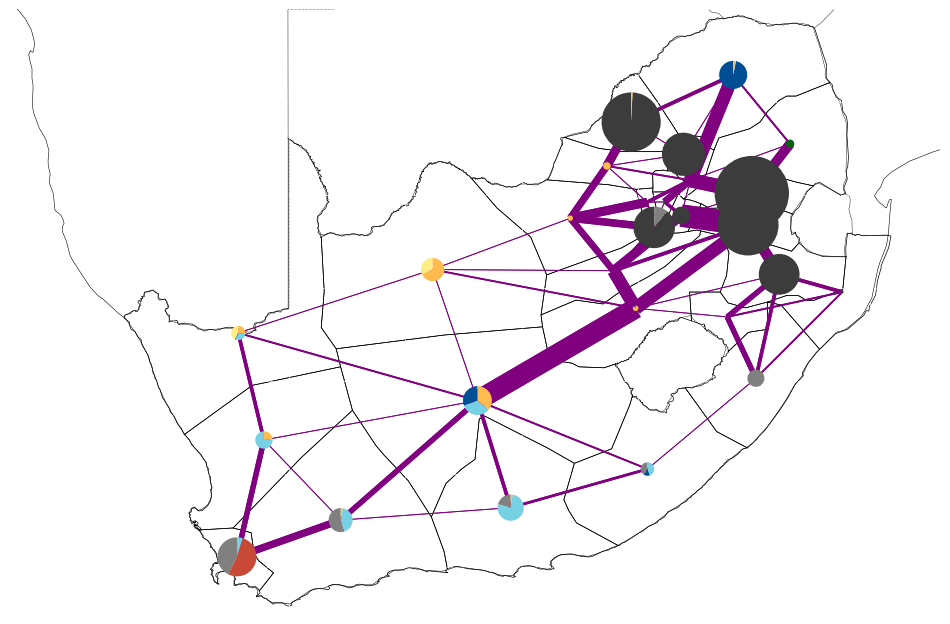

In [435]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12,12))
fig.set_facecolor('none')

ax.gridlines(color='white', linewidth=0.5, linestyle='--')

supply_regions.plot(ax=ax, facecolor='none', edgecolor='black')
#resarea.plot(ax=ax, facecolor='gray', alpha=0.2)

n.plot(
    ax=ax,
    bus_sizes=s / 20000,
    bus_colors=colors,
    line_colors='purple',
    line_widths=n.lines.s_nom_min/1.4e3,
    line_cmap=plt.cm.viridis,
    boundaries=map_boundaries
);

# Save plot as PNG
plt.savefig('karte.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()


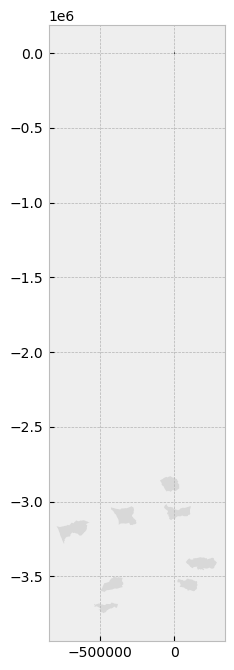

In [273]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx


# Create the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the shapes
supply_regions.plot(ax=ax, color='black', edgecolor='black')
resarea.plot(ax=ax, color='gray', alpha=0.2)

# Add the basemap using contextily
#ctx.add_basemap(ax=ax)

# Show the plot
plt.show()

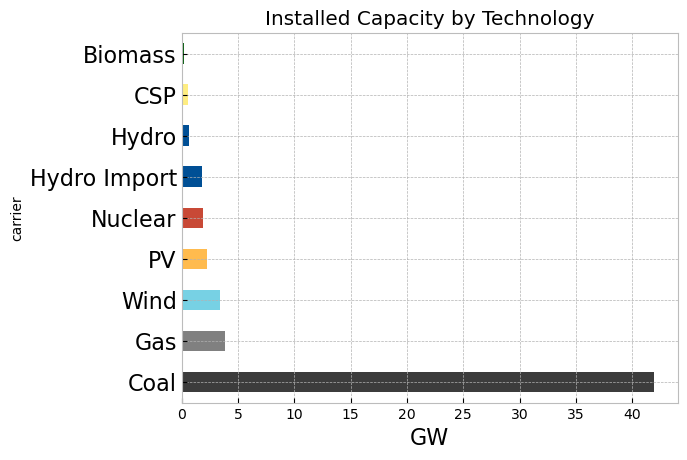

In [15]:
# Group by carrier and sum p_nom, /1000 to GW
a = n.generators.groupby('carrier')['p_nom'].sum().div(1e3)
a = a[a != 0] 

carrier_order = ['onwind', 'solar', 'CSP', 'hydro', 'hydro-import', 'biomass', 'gas', 'nuclear', 'coal']
a_sorted = a.loc[carrier_order].sort_values(ascending=False)

# Create horizontal bar chart
ax = a_sorted.plot.barh(color=[colors.get(carrier, '#333333') for carrier in a_sorted.index])
ax.set_xlabel('GW', fontsize=16)
ax.set_title('Installed Capacity by Technology')

ax.set_facecolor('white')

# Replace carrier names with nice names
ax.set_yticklabels([name_replacements.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()],fontsize=16)

# Save plot
plt.savefig('balken.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()

In [16]:
a

carrier
CSP              0.60000
biomass          0.19306
coal            41.94200
gas              3.84400
hydro            0.68302
hydro-import     1.76400
nuclear          1.85400
onwind           3.44259
solar            2.28707
Name: p_nom, dtype: float64

In [17]:
# Summe der installierten Kapazität - 53MW Literaturwert 2021

In [18]:
a.sum()

56.60974

In [19]:
carriers = carriers.reindex(['coal', 'gas', 'nuclear', 'hydro-import', 'hydro', 'biomass', 
                             'solar', 'CSP', 'onwind'])

NameError: name 'carriers' is not defined

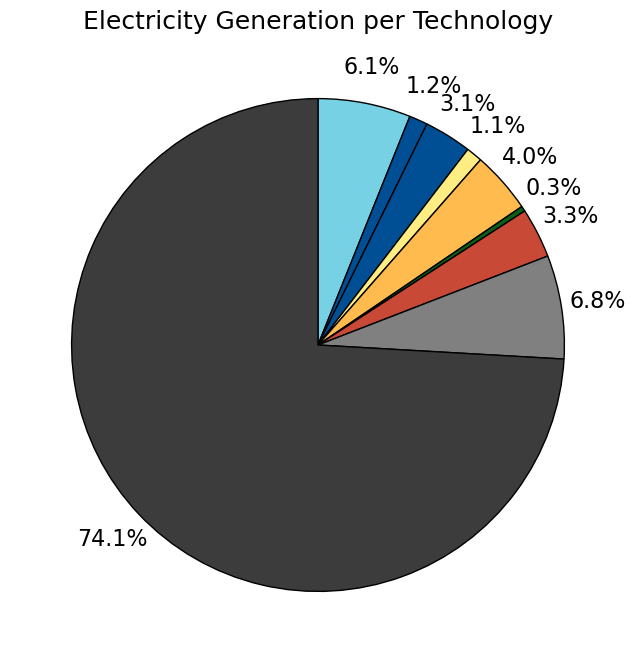

In [21]:
carriers = a.loc[colors.keys()]



wedgeprops = {'edgecolor': 'black', 'linewidth': 1}

plt.figure(figsize=(8,8))  # specify the figure size

plt.pie(carriers, labels=None, colors=colors.values(), autopct='%1.1f%%', 
        startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=1.15,
       textprops={'fontsize': 16})

plt.title('Electricity Generation per Technology', fontsize=18)

# Save plot as PNG with descriptive file name
plt.savefig('Kreis.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()


/tmp/ipykernel_326179/1341749826.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.legend(handles=[plt.Rectangle((0,0),2,1, color=color, edgecolor='black', linewidth=1) for color in colors.values()],


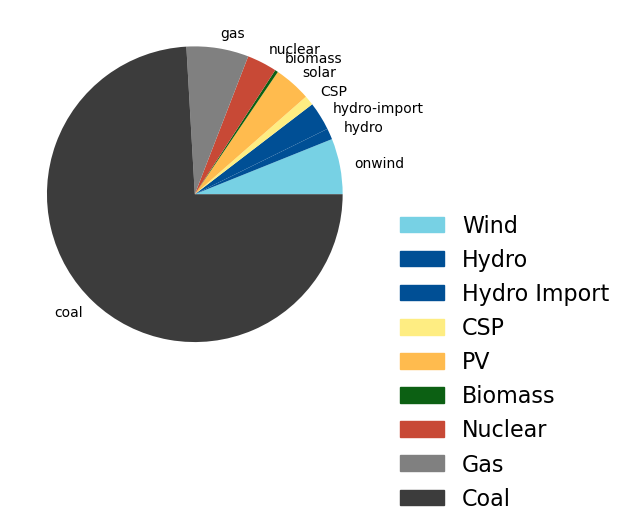

In [22]:
# Select carriers in the same order as in `a`
carriers = a.loc[colors.keys()]

# Calculate total capacity
total_capacity = carriers.sum()

# Create a pie chart of the sum of p_nom grouped by carrier
plt.pie(carriers, labels=carriers.index, colors=colors.values(), radius=1)

legend_table = []
for carrier, value in carriers.items():
    legend_table.append([colors[carrier], f"{name_replacements.get(carrier, carrier)}"])

plt.legend(handles=[plt.Rectangle((0,0),2,1, color=color, edgecolor='black', linewidth=1) for color in colors.values()],
           labels=[text for _, text in legend_table],
           loc='best', bbox_to_anchor=(1, 0.5), prop={'size': 16}, frameon=False)

#plt.title('Total Capacity by Carrier')
plt.savefig('legende.png', transparent=True, bbox_inches='tight', dpi=800)
plt.show()

In [14]:
name_replacements = {
'onwind': 'Wind',
'hydro': 'Hydro',
'hydro-import': 'Hydro Import',
'solar': 'PV',
'CSP': 'CSP',
'biomass': 'Biomass',
'gas': 'Gas',
'nuclear': 'Nuclear',
'coal': 'Coal',
# add more replacements as needed
}

In [13]:

colors = {
    "onwind": "#77D1E4",
    "hydro": "#004F95",
    "hydro-import": "#004F95",
    "CSP": "#FEED82",
    "solar": "#FFBB4E",
    "biomass": "#0c6013",
    #"CCGT": "#CCC8C8",
    #"OCGT": "#8D7867",
    "nuclear": "#C84936",
    "gas": "grey",
    "coal": "#3C3C3C",
}




In [ ]:
#Emissions

In [ ]:
# emissions
#gas 500 kg /MW
#coal 1000 kg /MW

In [405]:
emissions = n.generators.p_nom / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions)
emissions.sum().sum()

42601.50084816667

In [412]:
a

carrier
CSP              0.60000
biomass          0.19306
coal            41.94200
gas              3.84400
hydro            0.68302
hydro-import     1.76400
nuclear          1.85400
onwind           3.44259
solar            2.28707
Name: p_nom, dtype: float64

In [414]:
a.sum()

56.60974

In [417]:
emissions = (41.942*1 + 3.844*0.5) /56.60974
print(emissions)

0.7748489924172058


In [ ]:
# 775 grams CO2/ kw
# 2019 SA 912 gramms per kW - meine Annahme RE 0 grams und ohne Netz und Speicher
# global average 475 grams CO2 per kW